In [3]:
#Sequential 모댈을 만들고 모델에 필요한 레이어를 추가하는 방법

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense

In [5]:
# 컬럼명 정의 (마지막이 레이블 target)
cols = [
    "area", "perimeter", "compactness",
    "length", "width", "asymmetry", "groove_length",
    "target"
]

# 1) 데이터 로드 (확장자 없으면 그냥 경로, sep는 공백 기준)
df = pd.read_csv('./seeds_dataset.txt', sep=r"\s+", names=cols)

In [6]:
# 2. 특성과 레이블 분리
X = df.drop("target", axis=1).values      # shape: (210, 7)
y = df["target"].values - 1               # 원래 레이블은 1,2,3 → 0,1,2로 변환

In [7]:
# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# 4. 스케일링 (필수는 아니지만 안정적인 학습을 위해 권장)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [9]:
# 5. 텐서로 변환
#    (tf.data.Dataset을 써도 되지만, 여기서는 간단히 넘파이를 바로 Keras에 넘깁니다)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test  = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test  = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [10]:
# 6) 모델 정의
model = Sequential()
# - 은닉층: 유닛 16, 입력 차원 7
model.add(Dense(units=16, input_shape=(7,), activation='relu'))
# - 추가 은닉층: 유닛 8
model.add(Dense(units=8, activation='relu'))
# - 출력층: 클래스 수 3 → units=3, softmax
model.add(Dense(units=3, activation='softmax'))

C:\Users\leehy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 7) 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 8) 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.0564 - loss: 1.3030 - val_accuracy: 0.1176 - val_loss: 1.2423
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0688 - loss: 1.2499 - val_accuracy: 0.1176 - val_loss: 1.1795
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.1130 - loss: 1.1829 - val_accuracy: 0.1471 - val_loss: 1.1272
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1982 - loss: 1.1220 - val_accuracy: 0.2647 - val_loss: 1.0852
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3762 - loss: 1.0630 - val_accuracy: 0.3235 - val_loss: 1.0472
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4240 - loss: 1.0335 - val_accuracy: 0.3235 - val_loss: 1.0083
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6096 - loss: 0.9925 - val_accuracy: 0.5000 - val_loss: 0.9622
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6447 - loss: 0.9426 - val_accuracy: 0.5588 - val_loss: 0.9092

In [12]:
# 9. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 데이터 정확도: {acc:.4f}")


테스트 데이터 정확도: 0.8810


>>> 전체 손실(loss): 0.3652
>>> 전체 정확도(accuracy): 0.8810

=== Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    0.6429    0.7826        14
           1     0.8235    1.0000    0.9032        14
           2     0.8750    1.0000    0.9333        14

    accuracy                         0.8810        42
   macro avg     0.8995    0.8810    0.8731        42
weighted avg     0.8995    0.8810    0.8731        42

=== Confusion Matrix ===
[[ 9  3  2]
 [ 0 14  0]
 [ 0  0 14]]


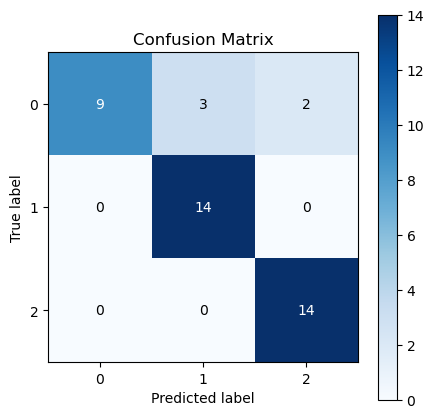

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1) 기본 평가: loss, accuracy
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f">>> 전체 손실(loss): {loss:.4f}")
print(f">>> 전체 정확도(accuracy): {acc:.4f}")

# 2) 예측 수행: 확률 → 클래스 라벨
y_prob = model.predict(X_test, verbose=0)         # shape: (N, 3)
y_pred = np.argmax(y_prob, axis=1)                # 가장 높은 확률 인덱스를 예측 클래스라벨로

# 3) 클래스별 리포트 출력
#    - precision, recall, f1-score, support(샘플 수)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# 4) 혼동 행렬 출력
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5) (선택) 혼동 행렬을 시각화하려면 matplotlib만 사용
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=[0,1,2],    # 클래스 라벨
    yticklabels=[0,1,2],
    ylabel='True label',
    xlabel='Predicted label',
    title='Confusion Matrix'
)
plt.colorbar(im, ax=ax)
# 각 셀에 숫자 표시
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.show()